In [1]:
# Import required libraries
import pandas as pd 
import numpy as np 
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input
from keras.optimizers import Adam

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# NOTE: only using Apple data at the moment
# unsure if its better to train per stock or all at once

# Create dataframes for the tweets and prices 
tweet_df = pd.read_csv('csv/aapl.csv')
price_df = pd.read_csv('csv/aapl_price.csv') # Retrieved from https://www.nasdaq.com/market-activity/stocks/aapl/historical

# Rename the date column so they match between dataframes
tweet_df.rename(columns = {'DATE': 'date'}, inplace = True)
price_df.rename(columns = {'Date' : 'date'}, inplace = True)

# Merge the dataframes based on the date column
merged_df = pd.merge(tweet_df, price_df, on = 'date')

# Save to csv for double checking
#merged_df.to_csv('merged.csv', index = False)

In [3]:
# Rename the sentiment score and stock price to something more maliable
merged_df.rename(columns = {'TEXTBLOB_POLARITY': 'sentimentScore', 'Close/Last': 'stockPrice'}, inplace = True)

# Create the final dataframe with only the sentiment score and stock price
final_df = merged_df[['sentimentScore', 'stockPrice']]

# Remove the $ sign in stock price, and convert both columns to float64 (may be redundant)
final_df.loc[:, 'stockPrice'] = final_df['stockPrice'].str.replace('$', '')
final_df.loc[:, 'sentimentScore'] = pd.to_numeric(final_df['sentimentScore'])
final_df.loc[:, 'stockPrice'] = pd.to_numeric(final_df['stockPrice'])

In [4]:
# NOTE: this scales the values for supposedly better allignment, but may not give intended results 

# Create the scaler
scaler = MinMaxScaler()

# Scale both values 
final_df.loc[:, ['sentimentScore', 'stockPrice']] = scaler.fit_transform(final_df[['sentimentScore', 'stockPrice']])


In [5]:
# Split the dataframe into X and y
X = final_df['sentimentScore'].values
y = final_df['stockPrice'].values

In [6]:
# Define the variable 'X' before reshaping it
X = final_df['sentimentScore'].values

# Define the variable 'y'
y = final_df['stockPrice'].values

# Reshape X
X = X.reshape(-1, 1, 1)

# Split X and Y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# More reshaping that needs to be fixed
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [7]:
# Define the variable 'final_df' before reshaping X_train
final_df = merged_df[['sentimentScore', 'stockPrice']]

# Define the variable 'X_train' before reshaping it
X_train = final_df['sentimentScore'].values

# Reshape X_train
X_train = X_train.reshape(-1, 1, 1)

# LSTM Model with Dropout and Dense
model = Sequential([
    Input(shape = X_train.shape[1:]),
    LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1:], 1)),
    Dropout(0.2), 
    LSTM(units = 50, return_sequences = True),
    Dropout(0.2),
    LSTM(units = 50),
    Dropout(0.2),
    Dense(units = 1)
])

# Use the Adam optimizer
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'mean_squared_error')


/Users/alijaffar/opt/miniconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Define and initialize the model
model = Sequential([
    Input(shape = X_train.shape[1:]),
    LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1:], 1)),
    Dropout(0.2), 
    LSTM(units = 50, return_sequences = True),
    Dropout(0.2),
    LSTM(units = 50),
    Dropout(0.2),
    Dense(units = 1)
])

# Convert the data type of input arrays to float32
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')


# Use the Adam optimizer
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'mean_squared_error')

# Ensure that X_train and y_train have the same number of samples
X_train = X_train[:len(y_train)]

# Fit the model with verbose settings for debugging
model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1)


# Calculate and print the loss
loss = model.evaluate(X_test, y_test)
print("Test Loss: ", loss)

Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2243
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0546
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0525
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0527
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0538
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0557
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0549
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0521
Epoch 9/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0547
Epoch 10/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0517
Epoch 11/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0529
Epoch 12/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0555
Epoch 13/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0523
Epoch 14/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0551
Epoch 15/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming the shape of X_train is (num_samples, timesteps, num_features)
# We'll reshape X_train and X_test to 2D
num_samples, timesteps, num_features = X_train.shape
X_train_2d = X_train.reshape(num_samples, timesteps * num_features)
X_test_2d = X_test.reshape(X_test.shape[0], timesteps * num_features)

# Define and initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model with the reshaped 2D training data
rf_model.fit(X_train_2d, y_train)

# Make predictions on the reshaped 2D test data
rf_predictions = rf_model.predict(X_test_2d)

# Calculate and print the loss for the test set predictions
rf_loss = mean_squared_error(y_test, rf_predictions)
print("Random Forest Test Loss: ", rf_loss)

Random Forest Test Loss:  0.05631243075711591


In [10]:
from sklearn.linear_model import LinearRegression

# Define and initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model with the reshaped 2D training data
lr_model.fit(X_train_2d, y_train)

# Make predictions on the reshaped 2D test data
lr_predictions = lr_model.predict(X_test_2d)

# Calculate and print the loss for the test set predictions
lr_loss = mean_squared_error(y_test, lr_predictions)
print("Linear Regression Test Loss: ", lr_loss)


Linear Regression Test Loss:  0.053374127


In [11]:
from sklearn.tree import DecisionTreeRegressor

# Define and initialize the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model with the reshaped 2D training data
dt_model.fit(X_train_2d, y_train)

# Make predictions on the reshaped 2D test data
dt_predictions = dt_model.predict(X_test_2d)

# Calculate and print the loss for the test set predictions
dt_loss = mean_squared_error(y_test, dt_predictions)
print("Decision Tree Test Loss: ", dt_loss)


Decision Tree Test Loss:  0.058767804263896294


In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Convert continuous labels to discrete integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define and initialize the Gaussian Naive Bayes model
bayes_model = GaussianNB()

# Fit the model with the reshaped 2D training data and encoded labels
bayes_model.fit(X_train_2d, y_train_encoded)

# Make predictions on the reshaped 2D test data
bayes_predictions = bayes_model.predict(X_test_2d)


# Calculate and print the accuracy for the test set predictions
accuracy = accuracy_score(y_test_encoded, bayes_predictions)
print("Gaussian Naive Bayes Test Accuracy: ", accuracy)


Gaussian Naive Bayes Test Accuracy:  0.21423728813559323


In [13]:
# Predict the stock prices using the trained model
y_pred = model.predict(X_train)

# Convert the predicted values to binary (0 or 1) based on whether the price goes up or down
y_pred_binary = np.where(y_pred > y_test, 1, 0)

# Print the last 10 predicted binary values
predicted_values = y_pred_binary.flatten()
pred_values = predicted_values[-10:]
print("Predicted values:", pred_values)

newpred_values = np.array(pred_values)



185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted values: [1 1 1 1 0 1 1 1 0 0]


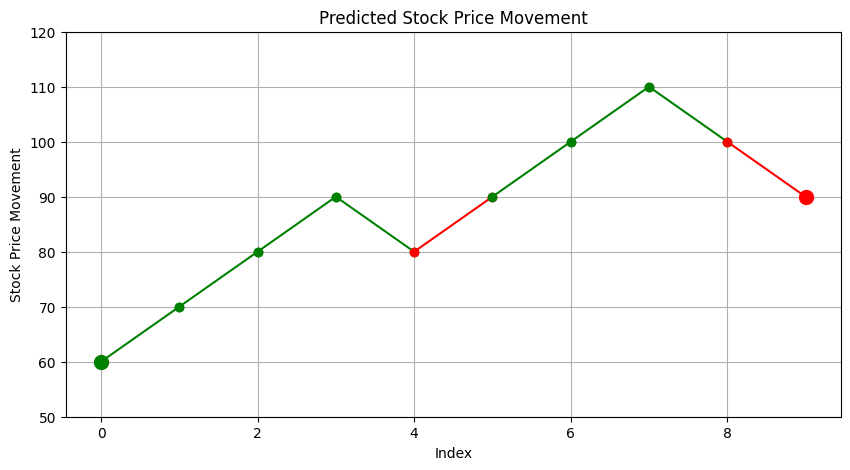

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Start at a base value (e.g., 50) for the y-axis
y_values = [50] 
for change in newpred_values:
    # Increase or decrease the stock price based on the prediction
    y_values.append(y_values[-1] + (10 if change == 1 else -10))

# Remove the starting base value to match the length of newpred_values
y_values.pop(0)

# Now plot the zigzag graph
plt.figure(figsize=(10,5))

# Plot the lines and points
for i in range(1, len(y_values)):
    # Choose color based on the prediction
    color = 'green' if newpred_values[i-1] == 1 else 'red'
    plt.plot([i-1, i], [y_values[i-1], y_values[i]], color=color, marker='o')

# Mark the starting and ending points with larger dots
plt.plot(0, y_values[0], 'go', markersize=10)  # Starting point
plt.plot(len(newpred_values)-1, y_values[-1], 'ro', markersize=10)  # Ending point

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Stock Price Movement')
plt.title('Predicted Stock Price Movement')
plt.grid(True)

# Adjust the y-axis limits for a clear view
plt.ylim(min(y_values) - 10, max(y_values) + 10)

# Display the plot
plt.show()


In [17]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np

# Download historical data
data = yf.download('AAPL','2020-01-01','2024-04-05')

# Preprocess data
data['Close'] = data['Close'].astype(float)
data = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split data into training and testing sets
train_data = scaled_data[0:int(len(scaled_data)*0.8), :]
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Define LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile and fit the model
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

# Test the model
test_data = scaled_data[len(train_data) - 60:, :]
x_test = []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Print predictions
print(predictions)

[*********************100%%**********************]  1 of 1 completed
/Users/alijaffar/opt/miniconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


797/797 - 7s - 9ms/step - loss: 0.0052
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[173.92734]
 [174.28221]
 [174.72888]
 [175.42665]
 [176.26189]
 [177.00414]
 [177.6226 ]
 [178.01135]
 [178.46198]
 [178.91043]
 [179.54459]
 [180.17273]
 [180.81001]
 [181.56055]
 [182.2115 ]
 [182.77501]
 [183.15625]
 [183.65092]
 [184.11041]
 [184.40764]
 [184.82346]
 [185.3365 ]
 [185.88377]
 [186.75755]
 [187.58676]
 [188.26018]
 [188.83972]
 [189.21799]
 [189.29247]
 [189.15848]
 [189.04514]
 [188.98871]
 [188.97385]
 [189.24878]
 [189.61517]
 [190.12727]
 [190.51399]
 [190.72803]
 [190.89899]
 [191.086  ]
 [191.3263 ]
 [191.4665 ]
 [191.76291]
 [192.14417]
 [192.4745 ]
 [192.51855]
 [192.3129 ]
 [191.25049]
 [189.6196 ]
 [187.87009]
 [186.02919]
 [184.2731 ]
 [182.68782]
 [181.46112]
 [180.36752]
 [179.39825]
 [178.38684]
 [177.49594]
 [176.84296]
 [176.47801]
 [176.60963]
 [176.61983]
 [176.79562]
 [177.15471]
 [177.89246]
 [179.04185]
 [180.3378 ]
 [181.75609]
 [183.14325]
 [183.86354]
 [183.78229]


In [21]:
def predict_stock(symbol):
    # Download historical data
    data = yf.download(symbol,'2020-01-01','2024-04-05')

    # Preprocess data
    data['Close'] = data['Close'].astype(float)
    data = data['Close'].values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Split data into training and testing sets
    train_data = scaled_data[0:int(len(scaled_data)*0.8), :]
    x_train, y_train = [], []
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Define LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))

    # Compile and fit the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

    # Test the model
    test_data = scaled_data[len(train_data) - 60:, :]
    x_test = []
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    # Print predictions
    print(predictions)

# List of stock symbols
stocks = ['AAPL', 'GOOG', 'MSFT']

# Predict for each stock
for stock in stocks:
    print(f"Predictions for {stock}:")
    predict_stock(stock)

[*********************100%%**********************]  1 of 1 completed

Predictions for AAPL:



/Users/alijaffar/opt/miniconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


796/796 - 7s - 9ms/step - loss: 0.0057
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[*********************100%%**********************]  1 of 1 completed

[[173.67853]
 [173.76588]
 [174.08728]
 [174.5183 ]
 [175.20576]
 [176.04968]
 [176.82236]
 [177.476  ]
 [177.90007]
 [178.36435]
 [178.82309]
 [179.45679]
 [180.0941 ]
 [180.7406 ]
 [181.49568]
 [182.16129]
 [182.73619]
 [183.12627]
 [183.60887]
 [184.05963]
 [184.351  ]
 [184.74396]
 [185.23567]
 [185.76917]
 [186.62334]
 [187.46129]
 [188.15462]
 [188.7488 ]
 [189.13953]
 [189.21913]
 [189.06953]
 [188.91579]
 [188.8112 ]
 [188.74986]
 [188.97374]
 [189.31187]
 [189.80836]
 [190.20381]
 [190.43245]
 [190.60905]
 [190.79596]
 [191.03412]
 [191.1796 ]
 [191.46938]
 [191.85075]
 [192.19202]
 [192.25594]
 [192.05737]
 [191.00787]
 [189.34148]
 [187.50186]
 [185.55177]
 [183.67476]
 [181.97276]
 [180.63914]
 [179.47638]
 [178.46587]
 [177.44446]
 [176.5539 ]
 [175.91214]
 [175.57425]
 [175.74377]
 [175.8415 ]
 [176.1024 ]
 [176.55023]
 [177.37335]
 [178.61592]
 [180.02808]
 [181.56886]
 [183.08273]
 [183.94127]
 [183.96399]
 [183.53828]
 [182.93253]
 [182.0079 ]
 [180.81526]
 [179.67113]


/Users/alijaffar/opt/miniconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


796/796 - 7s - 9ms/step - loss: 0.0039
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[*********************100%%**********************]  1 of 1 completed

[[129.42863 ]
 [130.06111 ]
 [130.55037 ]
 [130.79625 ]
 [131.0005  ]
 [131.24178 ]
 [131.61572 ]
 [132.14494 ]
 [132.19579 ]
 [132.00322 ]
 [131.71974 ]
 [131.56209 ]
 [131.48372 ]
 [131.45207 ]
 [131.59308 ]
 [131.62808 ]
 [131.5983  ]
 [131.27748 ]
 [131.11623 ]
 [130.94719 ]
 [130.40382 ]
 [129.7372  ]
 [129.27406 ]
 [128.83961 ]
 [128.56868 ]
 [128.36296 ]
 [128.4238  ]
 [128.43523 ]
 [128.3548  ]
 [127.910904]
 [127.42333 ]
 [127.14003 ]
 [127.499756]
 [128.21954 ]
 [128.99678 ]
 [129.63812 ]
 [130.02118 ]
 [129.91086 ]
 [129.64955 ]
 [129.4801  ]
 [129.45392 ]
 [130.19281 ]
 [131.23936 ]
 [132.6722  ]
 [134.15935 ]
 [135.40749 ]
 [136.08537 ]
 [136.43294 ]
 [136.54227 ]
 [136.86017 ]
 [137.2173  ]
 [137.39198 ]
 [137.47508 ]
 [137.4963  ]
 [137.65213 ]
 [137.69125 ]
 [137.56245 ]
 [137.50465 ]
 [137.23871 ]
 [136.9936  ]
 [136.85254 ]
 [137.13281 ]
 [137.29666 ]
 [137.43872 ]
 [137.66446 ]
 [138.28032 ]
 [139.15901 ]
 [140.12485 ]
 [140.98392 ]
 [141.69815 ]
 [142.12756 ]
 [142.


/Users/alijaffar/opt/miniconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


796/796 - 7s - 9ms/step - loss: 0.0023
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[315.73502]
 [317.71796]
 [319.81253]
 [321.56464]
 [323.35193]
 [325.2173 ]
 [326.99353]
 [328.37122]
 [328.54315]
 [328.26236]
 [327.8686 ]
 [327.86734]
 [328.25925]
 [329.08353]
 [330.98035]
 [332.74475]
 [333.96173]
 [334.41446]
 [334.96246]
 [335.0667 ]
 [334.4001 ]
 [333.92145]
 [333.6528 ]
 [333.44833]
 [333.7758 ]
 [334.1138 ]
 [334.4639 ]
 [335.05786]
 [335.36636]
 [335.05792]
 [334.52716]
 [334.3175 ]
 [334.7376 ]
 [335.65527]
 [336.7966 ]
 [339.14508]
 [341.48242]
 [342.93878]
 [343.57248]
 [343.83005]
 [344.34967]
 [343.78308]
 [342.15897]
 [340.79965]
 [339.43207]
 [338.23553]
 [336.47635]
 [334.55365]
 [332.807  ]
 [331.49988]
 [330.18698]
 [328.6894 ]
 [327.30527]
 [325.93353]
 [324.95804]
 [324.0794 ]
 [323.22174]
 [322.15936]
 [321.0631 ]
 [320.5007 ]
 [320.2951 ]
 [320.68832]
 [320.75397]
 [320.9349 ]
 [321.20264]
 [321.89014]
 [322.75223]
 [323.54758]
 [324.32025]
 [325.42303]
 [326.52332]


Metrics for AAPL:
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
MSE: 0.34188312292099
MAE: 0.5443011522293091


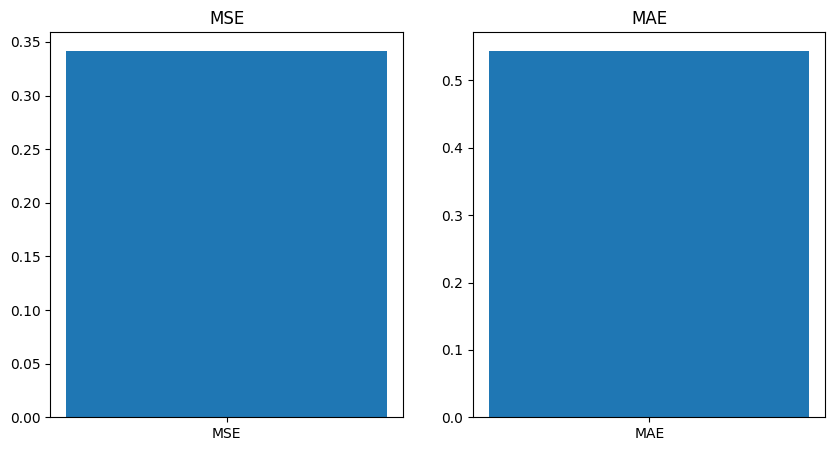

Metrics for GOOG:
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
MSE: 0.34188312292099
MAE: 0.5443011522293091


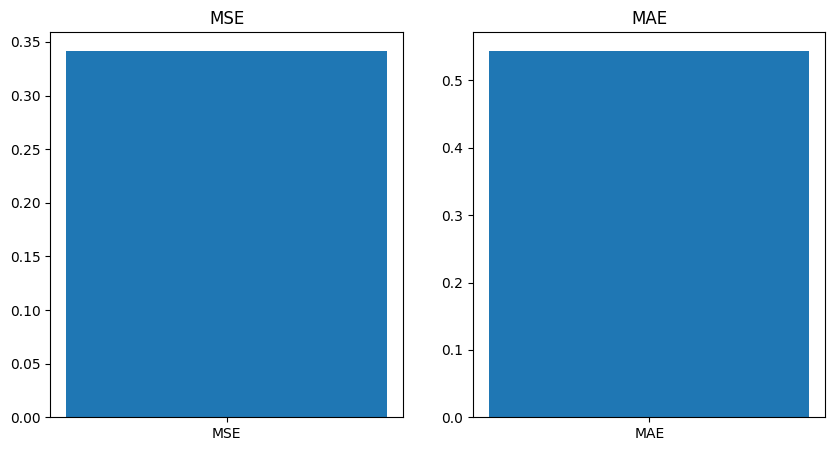

Metrics for MSFT:
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
MSE: 0.34188312292099
MAE: 0.5443011522293091


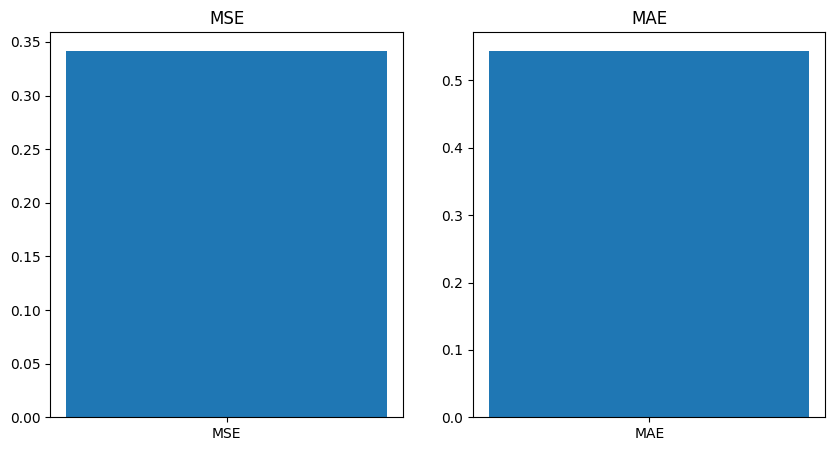

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

def calculate_and_plot_metrics(y_true, y_pred):
    # Calculate metrics
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    # Print metrics
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")

    # Plot metrics
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("MSE")
    plt.bar(['MSE'], [mse])

    plt.subplot(1, 2, 2)
    plt.title("MAE")
    plt.bar(['MAE'], [mae])

    plt.show()

# Calculate and plot metrics for each stock
for stock in stocks:
    print(f"Metrics for {stock}:")
    y_true = y_test
    y_pred = model.predict(X_test)
    calculate_and_plot_metrics(y_true, y_pred)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step
Optimal Threshold: 0.06473730504512787
Precision: 0.031042128603104215
Recall: 0.9130434782608695
F1 Score: 0.06004288777698356
ROC AUC: 0.46504092250585694


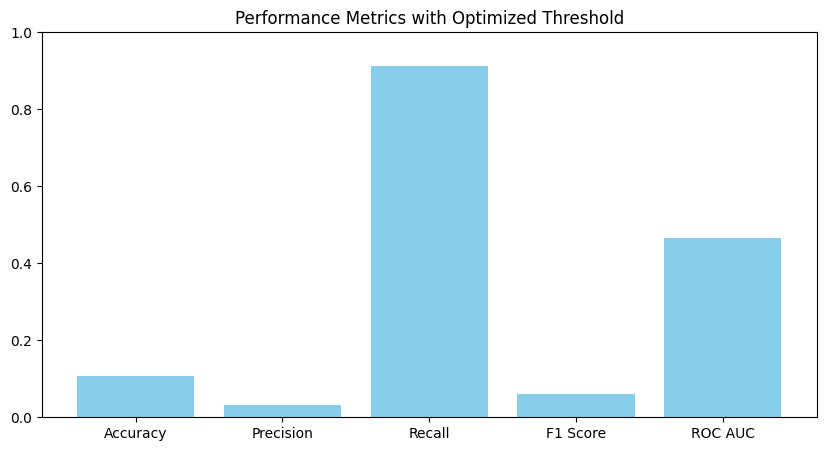

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_true, X_test are defined, and model is trained

# Predict scores
y_scores = model.predict(X_test)

# Find the optimal threshold
fpr, tpr, thresholds = roc_curve(y_true.astype(int), y_scores)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Convert the predicted values to binary based on the optimal threshold
y_pred_binary_optimal = np.where(y_scores > optimal_threshold, 1, 0)

# Calculate metrics using the binary values with the optimal threshold
accuracy_opt = accuracy_score(y_true.astype(int), y_pred_binary_optimal)
precision_opt = precision_score(y_true.astype(int), y_pred_binary_optimal)
recall_opt = recall_score(y_true.astype(int), y_pred_binary_optimal)
f1_opt = f1_score(y_true.astype(int), y_pred_binary_optimal)
roc_auc_opt = roc_auc_score(y_true.astype(int), y_scores)

# Print metrics
print(f"Optimal Threshold: {optimal_threshold}")
print(f"Precision: {precision_opt}")
print(f"Recall: {recall_opt}")
print(f"F1 Score: {f1_opt}")
print(f"ROC AUC: {roc_auc_opt}")

# Plot metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
values_opt = [accuracy_opt, precision_opt, recall_opt, f1_opt, roc_auc_opt]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values_opt, color='skyblue')
plt.ylim([0.0, 1.0])
plt.title('Performance Metrics with Optimized Threshold')
plt.show()


In [129]:
'''
import yfinance as yf
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from textblob import TextBlob  # for sentiment analysis



# Function for sentiment analysis
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Download historical market data for AAPL for the past week
price_data = yf.download('AAPL', start='2022-01-01', end='2024-04-08')

# Keep only the 'Close' column and rename it to 'stockPrice'
y_true = price_data[['Close']].rename(columns={'Close': 'stockPrice'})


# Get tweet data
# This will depend on your source of tweets. Here's a placeholder
tweets = pd.DataFrame() 
tweets = pd.read_csv('output.csv')
print(tweets.head())

# Preprocess tweet data
tweets['sentimentScore'] = tweets['Sentiment'].apply(get_sentiment)
X = pd.get_dummies(tweets['sentimentScore'])

# Predict with your model
# Replace 'model' with your actual model
y_test = model.predict(X)

# Convert the predicted values to a DataFrame
y_test = pd.DataFrame(y_test, columns=['stockPrice'])

# Convert the DataFrame to a Series
y_test = y_test['stockPrice']

y_pred = model.predict(X)

# Convert the predicted values to a DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['stockPrice'])

# Compare the predicted values with the actual stock prices
comparison_df = pd.concat([y_true, y_pred_df], axis=1)

# Print the comparison DataFrame
print(comparison_df)

# Get the previous day's closing price
previous_close = price_data['Close'].shift(1)

# Compare the predicted values with the previous day's closing price
price_direction = ['Up' if pred > prev_close else 'Down' for pred, prev_close in zip(predictions, previous_close)]

# Create a DataFrame to store the price direction
price_direction_df = pd.DataFrame({'Predicted Price Direction': price_direction})

# Print the price direction DataFrame
print(price_direction_df)

# Assuming 'comparison_df' is your DataFrame containing both actual and predicted prices

# Filter out the rows that contain the predicted values.
# This is based on the assumption that the actual stock prices have NaNs in the second 'stockPrice' column.
predicted_prices = comparison_df[comparison_df['stockPrice'].isna()].iloc[:, 1]

# Calculate the average of the predicted values
average_predicted_price = predicted_prices.mean()

print(f"Average Predicted Price (Relative Change): {average_predicted_price}")

'''

'\nimport yfinance as yf\nimport pandas as pd\nfrom sklearn.metrics import mean_squared_error, mean_absolute_error\nfrom sklearn.preprocessing import OneHotEncoder\nfrom textblob import TextBlob  # for sentiment analysis\n\n\n\n# Function for sentiment analysis\ndef get_sentiment(text):\n    return TextBlob(text).sentiment.polarity\n\n# Download historical market data for AAPL for the past week\nprice_data = yf.download(\'AAPL\', start=\'2022-01-01\', end=\'2024-04-08\')\n\n# Keep only the \'Close\' column and rename it to \'stockPrice\'\ny_true = price_data[[\'Close\']].rename(columns={\'Close\': \'stockPrice\'})\n\n\n# Get tweet data\n# This will depend on your source of tweets. Here\'s a placeholder\ntweets = pd.DataFrame() \ntweets = pd.read_csv(\'output.csv\')\nprint(tweets.head())\n\n# Preprocess tweet data\ntweets[\'sentimentScore\'] = tweets[\'Sentiment\'].apply(get_sentiment)\nX = pd.get_dummies(tweets[\'sentimentScore\'])\n\n# Predict with your model\n# Replace \'model\' with

In [132]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import yfinance as yf

# Define the stock symbol
stock_symbol = 'AAPL'

# Load the stock data
stock_data = yf.Ticker(stock_symbol)

# Get the most recent stock price
live_stock_price = stock_data.history().tail(1)['Close'].iloc[0]

print (live_stock_price)

print(f"The most live stock price for {stock_symbol} is: {live_stock_price}")

# Load tweet sentiment data
tweet_data = pd.read_csv('/Users/alijaffar/Downloads/TwitterSentiment-main/output.csv')
print(tweet_data.columns) 

# Assuming the date column in tweet_data is actually named 'date'
if 'Date' in tweet_data.columns:
    tweet_data['Date'] = pd.to_datetime(tweet_data['Date'])  # Convert to datetime format
    tweet_data.rename(columns={'TEXTBLOB_POLARITY': 'Sentiment', 'Date': 'Date'}, inplace=True)
else:
    print("Error: 'Date' column not found in tweet_data DataFrame.")

# Now try merging again
merged_data = pd.concat([tweet_data.set_index('Date'), price_data.set_index('Date')], axis=1, join='inner').reset_index()

# Select and rename columns
final_data = merged_data[['Date', 'Sentiment', 'stockPrice']]

# Scale the data
scaler = MinMaxScaler()
final_data[['Sentiment', 'stockPrice']] = scaler.fit_transform(final_data[['Sentiment', 'stockPrice']])

# Scale the data
scaler = MinMaxScaler()

if not final_data.empty:
    final_data[['Sentiment', 'stockPrice']] = scaler.fit_transform(final_data[['Sentiment', 'stockPrice']])
else:
    print("Error: No data available in final_data DataFrame.")

# Prepare features (X) and target (y)
X = final_data[['Sentiment']]
y = final_data['stockPrice']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and compile the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


168.4499969482422
The most live stock price for AAPL is: 168.4499969482422
Index(['Tweet', 'Sentiment', 'Date'], dtype='object')


InvalidIndexError: Reindexing only valid with uniquely valued Index objects